# Mode Pairing



## Original Shapes



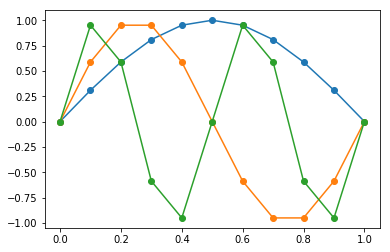

In [85]:
import numpy as np
import vibs
import matplotlib.pyplot as plt


# create shapes
x = np.linspace(0,1,11)
a = np.empty((11,3))
a[:,0] = np.sin(x*np.pi)
a[:,1] = np.sin(x*2*np.pi)
a[:,2] = np.sin(x*4*np.pi)

# plot shapes
fig, ax = plt.subplots()

ax.plot(x,a,'o-')
plt.show()


def plot_shapes(y):
    fig, ax = plt.subplots()
    ax.plot(x,y,'o-')
    plt.show()

## Blurry Shapes



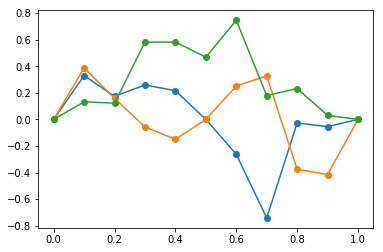

In [90]:
# add white noise 
order = (1,2,0)
b = a[:,order] * (np.random.random(a.shape) * .8)
#b = np.concatenate(b, a + .25*np.random.random(a.shape))

plot_shapes(b)

# reorder modal rank
order = (1,2,0)

## Modal Assurance Criterion (MAC)



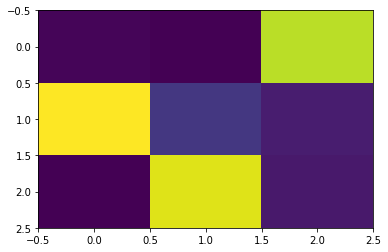

Modal Assurance Criterion:
[[  1.23929296e-02   2.66633213e-04   7.54239531e-01]
 [  8.39930069e-01   1.34974864e-01   6.72879121e-02]
 [  4.79013675e-05   7.97526835e-01   5.90864816e-02]]


In [87]:
# get mac
M = vibs.MAC(a,b)
M.plot()

print(M)

## Pair Modes

Find top pairs to master shape letting master shape's modal rank dictate pair order.



In [88]:

# number of paired modes
#n = np.min((a.shape[1], b.shape[1]))

# sort from 0->1 in terms of shape 'likeness' 
ms = np.argsort(M.m) 

# return indices of best shape pairs (pairing u2 [slave] to u1 [master])
pairid = ms[:,-1]


# remove pairs retaining order


## WORKS ONLY IN PYTHON VERSIONS >= 3.6

#import sys
#if sys.version_info >= (3,6):
#    pairid = list(dict.fromkeys(pairid)))
pairid = list(dict.fromkeys(pairid))

## GENERAL SOLUTION (SLOWER)
#    from: https://www.peterbe.com/plog/uniqifiers-benchmark
def unique(seq):
    """
    return array of unique values with the original order preserved 
    (i.e. only returns first values found in order) 
    """
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]



## Results

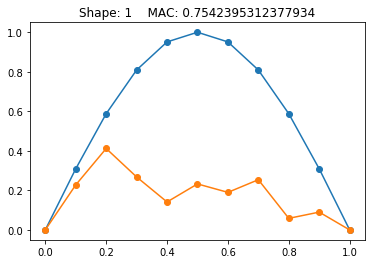

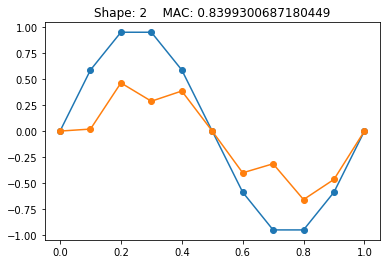

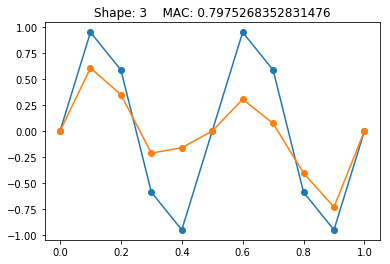

In [89]:
for mode in np.arange(len(pairid)):
    fig, ax = plt.subplots()
    ax.plot(x,a[:,mode],'o-')
    ax.plot(x,b[:,pairid[mode]],'o-')
    plt.title('Shape: {}    MAC: {}'.format(mode+1,M.m[mode,pairid[mode]]))
    plt.show()